## Question 5


RELATIONSHIP BETWEEN COMPULSIVE BUYING BEHAVIOUR AND CONSUMERS PSYCHOGRAPHIC TRAITS

In [1]:
#loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Data_Set.csv")

/Users/shruthi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,19,21,49,85,86,100) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#creating a subset of the dataframe with values  that contribute to
#compulsive buying and customers psychographic traits

#creating new attribute totspent which is the sum of amount spent in both cards
df['totspent'] = df['cardspent'] + df['card2spent']
#creating new attribute totdebt which is the sum of debt to income and other debts
df['totdebt'] = df['debtinc'] + df['othdebt']
#creating new attribute bal that calculates the balance that remains after repaying all the debts and 
#amount spent using  credit card from income
df['bal'] = df['income'] - ( df['totspent'] + df['totdebt'] )

re=df[["age", "gender", "totdebt", "bal", "edcat", "jobcat", "union", "employ", "empcat", "retire", "jobsat", "reside", "pets", "homeown", "cars", "cartype", "carvalue", "commute", "reason", "polview", "polparty", "vote", "active", "tenure", "churn", "equip", "owntv", "hourstv", "ownpc", "owngame", "news", "income", "card", "cardtype", "cardtenure", "totspent", "debtinc", "inccat", "jobcat", "creddebt", "othdebt", "churn"]]

In [3]:
re.columns

Index(['age', 'gender', 'totdebt', 'bal', 'edcat', 'jobcat', 'union', 'employ',
       'empcat', 'retire', 'jobsat', 'reside', 'pets', 'homeown', 'cars',
       'cartype', 'carvalue', 'commute', 'reason', 'polview', 'polparty',
       'vote', 'active', 'tenure', 'churn', 'equip', 'owntv', 'hourstv',
       'ownpc', 'owngame', 'news', 'income', 'card', 'cardtype', 'cardtenure',
       'totspent', 'debtinc', 'inccat', 'jobcat', 'creddebt', 'othdebt',
       'churn'],
      dtype='object')

In [4]:
re.head(10)

,age,gender,totdebt,bal,edcat,jobcat,union,employ,empcat,retire,...,card,cardtype,cardtenure,totspent,debtinc,inccat,jobcat,creddebt,othdebt,churn
0,20.0,1.0,13.34,-131.80,3.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,2.0,149.46,11.1,2.0,1.0,1.20,2.24,1.0
1,22.0,0.0,20.17,-82.71,4.0,2.0,0.0,0.0,1.0,0.0,...,2.0,4.0,4.0,77.54,18.6,1.0,2.0,1.22,1.57,0.0
2,67.0,1.0,12.44,-337.41,2.0,2.0,0.0,16.0,5.0,0.0,...,2.0,1.0,35.0,359.97,9.9,2.0,2.0,0.93,2.54,0.0
3,23.0,0.0,6.82,-346.23,3.0,2.0,0.0,0.0,1.0,0.0,...,2.0,1.0,5.0,359.41,5.7,1.0,2.0,0.02,1.12,0.0
4,26.0,0.0,1.88,-486.71,3.0,2.0,0.0,1.0,1.0,0.0,...,4.0,2.0,8.0,507.83,1.7,1.0,2.0,0.21,0.18,0.0
5,64.0,0.0,10.53,-131.80,4.0,3.0,0.0,22.0,5.0,0.0,...,2.0,4.0,18.0,228.27,5.6,4.0,3.0,1.06,4.93,0.0
6,52.0,1.0,2.86,-878.32,2.0,1.0,0.0,10.0,3.0,0.0,...,5.0,3.0,3.0,952.46,1.9,4.0,1.0,0.50,0.96,0.0
7,44.0,1.0,22.42,-1230.22,3.0,1.0,0.0,11.0,4.0,0.0,...,1.0,1.0,25.0,1304.80,14.4,4.0,1.0,5.95,8.02,0.0
8,66.0,1.0,2.91,-454.74,2.0,1.0,0.0,15.0,4.0,1.0,...,3.0,4.0,26.0,467.83,2.6,1.0,1.0,0.10,0.31,0.0
9,47.0,0.0,5.77,-232.58,1.0,6.0,0.0,19.0,5.0,0.0,...,5.0,4.0,2.0,310.81,4.1,4.0,6.0,1.77,1.67,1.0


In [5]:
re.describe()

,age,gender,totdebt,bal,edcat,jobcat,union,employ,empcat,retire,...,card,cardtype,cardtenure,totspent,debtinc,inccat,jobcat,creddebt,othdebt,churn
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000
mean,47.025600,0.503600,13.608616,-456.927646,2.672000,2.7528,0.15120,9.730400,2.9326,0.147600,...,2.714200,2.507000,16.655800,498.07863,9.954160,2.392200,2.7528,1.857364,3.654456,0.253200
std,17.770338,0.500037,10.066703,336.103663,1.211738,1.7379,0.35828,9.690929,1.4533,0.354739,...,1.184905,1.118482,12.020958,351.52927,6.399783,1.221261,1.7379,3.415789,5.395214,0.434888
min,18.000000,0.000000,0.000000,-4739.800000,1.000000,1.0000,0.00000,0.000000,1.0000,0.000000,...,1.000000,1.000000,0.000000,8.11000,0.000000,1.000000,1.0000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,6.660000,-570.870000,2.000000,1.0000,0.00000,2.000000,2.0000,0.000000,...,2.000000,2.000000,6.000000,276.28250,5.100000,1.000000,1.0000,0.390000,0.980000,0.000000
50%,47.000000,1.000000,11.480000,-377.740000,2.000000,2.0000,0.00000,7.000000,3.0000,0.000000,...,3.000000,3.000000,14.000000,414.25000,8.800000,2.000000,2.0000,0.930000,2.100000,0.000000
75%,62.000000,1.000000,18.032500,-244.635000,4.000000,4.0000,0.00000,15.000000,4.0000,0.000000,...,4.000000,4.000000,26.000000,615.56250,13.600000,3.000000,4.0000,2.060000,4.310000,1.000000
max,79.000000,1.000000,162.460000,113.980000,5.000000,6.0000,1.00000,52.000000,5.0000,1.000000,...,5.000000,4.000000,40.000000,4881.05000,43.100000,5.000000,6.0000,109.070000,141.460000,1.000000


In [6]:
re.isnull().sum().any()

False

In [7]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         5000 non-null   float64
 1   gender      5000 non-null   float64
 2   totdebt     5000 non-null   float64
 3   bal         5000 non-null   float64
 4   edcat       5000 non-null   float64
 5   jobcat      5000 non-null   float64
 6   union       5000 non-null   float64
 7   employ      5000 non-null   float64
 8   empcat      5000 non-null   float64
 9   retire      5000 non-null   float64
 10  jobsat      5000 non-null   float64
 11  reside      5000 non-null   float64
 12  pets        5000 non-null   float64
 13  homeown     5000 non-null   float64
 14  cars        5000 non-null   float64
 15  cartype     5000 non-null   float64
 16  carvalue    5000 non-null   float64
 17  commute     5000 non-null   float64
 18  reason      5000 non-null   float64
 19  polview     5000 non-null  

there is no null value or missing value in the chosen subset of data

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

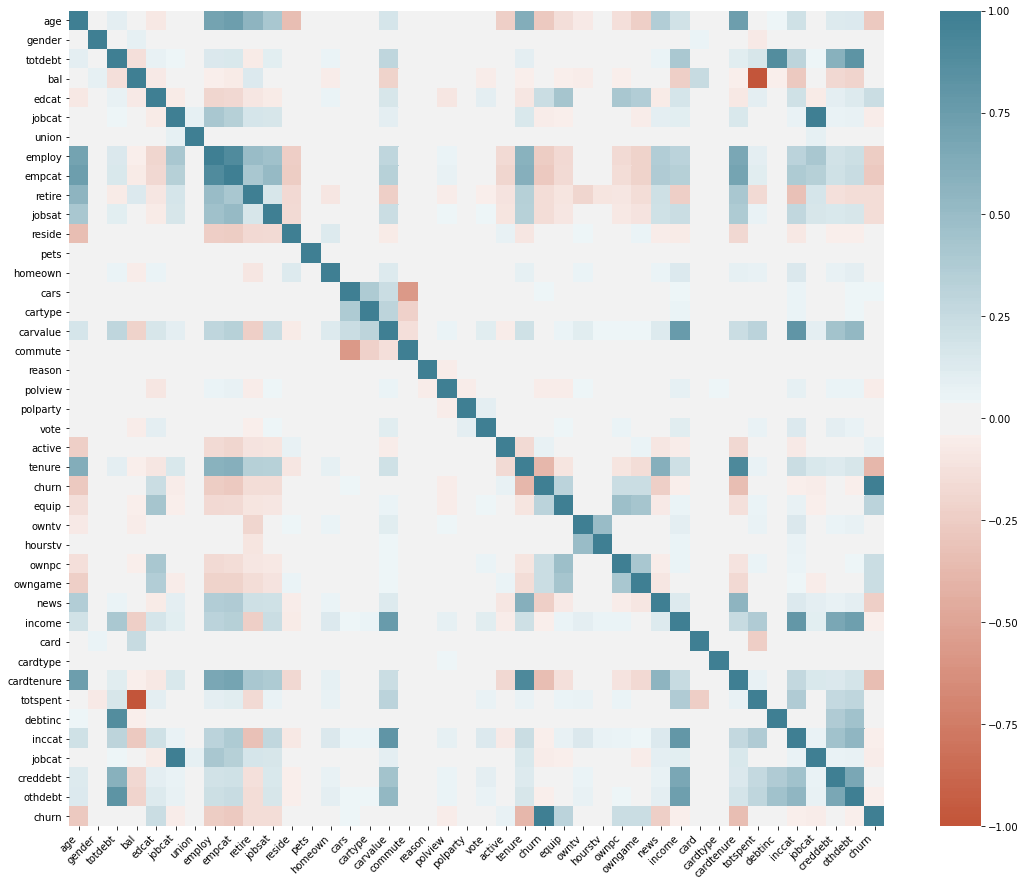

In [9]:
# lets find out the variables that are correlated to perform further analysis 
#correlation using heatmap

plt.subplots(figsize=(20,15))
corr = re.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [10]:
# lets drop the attributes that dont contribute much.
rel=re.drop(["union","homeown","reason","polview","polparty","vote","card","cardtype","active"],axis=1)

Text(0.5, 0, 'union')

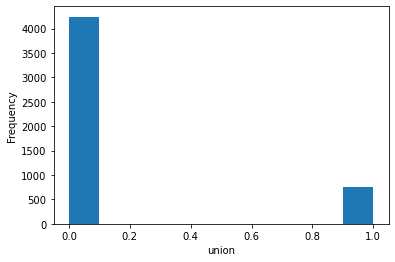

In [11]:
re['union'].plot(kind = 'hist')
plt.xlabel("union")
#customers are equally distributed for all card type like platinum , gold , silver

among 5000 customers only less than 1000 customers are members of a union

Text(0.5, 0, 'polview')

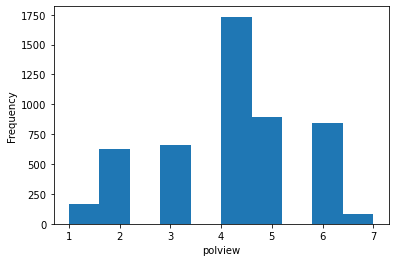

In [12]:
re['polview'].plot(kind = 'hist')
plt.xlabel("polview")

political view has 7 categories 
1.Extremely liberal
2.liberal
3.slightly liberal
4.moderate
5.slightly conservative
6.conservative
7.extremely conservative 
 
From the graph customers with modetare political view are highest in number.

Text(0.5, 0, 'polparty')

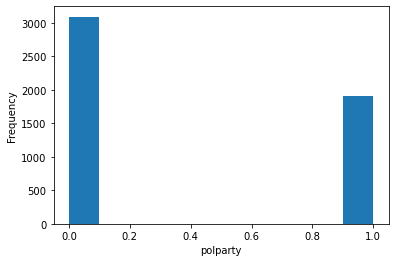

In [13]:
re['polparty'].plot(kind = 'hist')
plt.xlabel("polparty")

political party membership
1- has membership
0- no membership

among 5000 credit card customers around 3000 are not a member of any political party and remaining 2000 are part of some party.

Text(0.5, 0, 'vote')

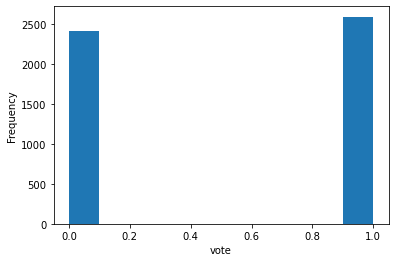

In [14]:
re['vote'].plot(kind = 'hist')
plt.xlabel("vote")

the customers who voted in the last election and who didn’t vote in the last election are almost equally distributed

Text(0.5, 0, 'card')

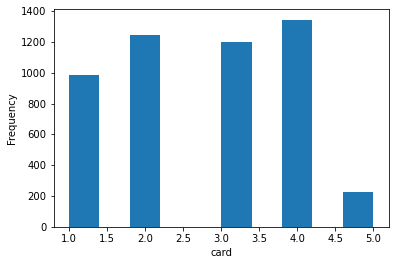

In [15]:
re['card'].plot(kind = 'hist')
plt.xlabel("card")
#visa and discover have highest card holders

card 
1.american express
2.visa
3.mastercard
4.discover
5.other


A very few customers ( around 200+) have card provider other than american express, visa, mastercard and discover

Text(0.5, 0, 'cardtype')

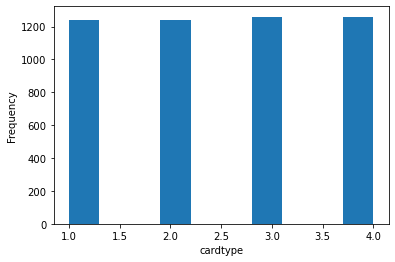

In [16]:
re['cardtype'].plot(kind = 'hist')
plt.xlabel("cardtype")

customers are equally distributed  across all card types like gold, platinum and silver

Text(0.5, 0, 'active')

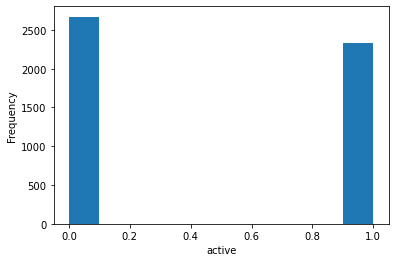

In [17]:
re['active'].plot(kind = 'hist')
plt.xlabel("active")

there is no vast difference between customers who have active lifestyles and those who dont

Text(0.5, 0, 'homeown')

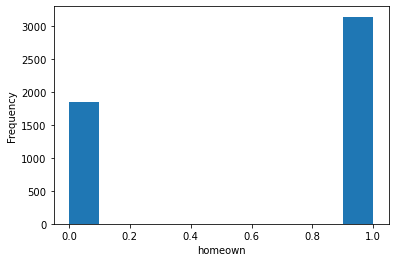

In [18]:
re['homeown'].plot(kind = 'hist')
plt.xlabel("homeown")

around 1800 customers dont own a home and are living in rented homes 
remiang 3200 customers are home owners

Text(0.5, 0, 'cartype')

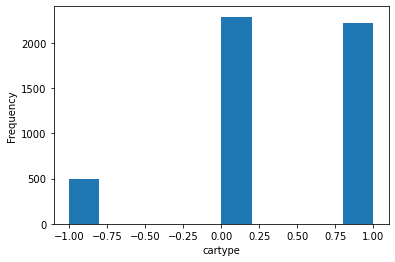

In [19]:
re['cartype'].plot(kind = 'hist')
plt.xlabel("cartype")

car type
-1 - dont own a car
0  - own a domestic car
1  - own an imported car

very less customers (around 500) dont own a car, the remaining thier own domestic or imported cars

Text(0.5, 0, 'commute')

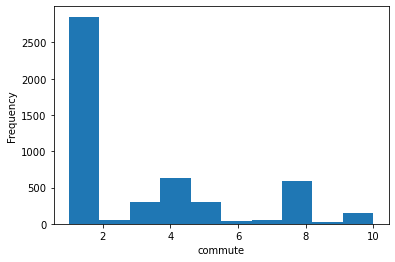

In [20]:
re['commute'].plot(kind = 'hist')
plt.xlabel("commute")

commute
1 - car
2 - motorcycle
3 - carpool
4 - bus
5 - train/subway
6 - other public transit
7 - bicycle
8 - walk
9 - other non-motorised transit
10 - telecommute

majority of the customers use car as a means of commute followed by bus or walk


Text(0.5, 0, 'retire')

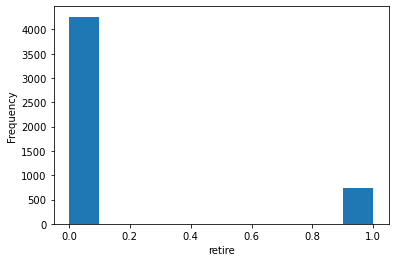

In [21]:
re['retire'].plot(kind = 'hist')
plt.xlabel("retire")

less than 1000 card holders are retired

In [22]:
rel.age.value_counts()

18.0    106
35.0    102
37.0     98
24.0     97
63.0     95
21.0     95
31.0     94
25.0     93
57.0     93
36.0     92
29.0     91
68.0     91
27.0     91
51.0     89
32.0     89
28.0     89
33.0     88
26.0     88
47.0     85
34.0     85
30.0     85
55.0     85
56.0     84
44.0     84
23.0     84
48.0     83
22.0     82
66.0     82
61.0     81
43.0     80
20.0     80
46.0     79
54.0     79
52.0     79
42.0     79
49.0     79
69.0     79
19.0     78
67.0     78
39.0     77
53.0     77
64.0     75
60.0     75
50.0     74
75.0     74
79.0     73
41.0     73
65.0     73
59.0     72
38.0     72
77.0     71
58.0     70
78.0     70
70.0     70
40.0     70
45.0     69
62.0     67
73.0     65
71.0     62
72.0     61
74.0     61
76.0     58
Name: age, dtype: int64

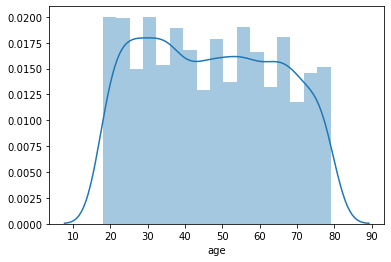

In [23]:
sns.distplot(rel.age)

min cardholder's age is 18 and max is 76

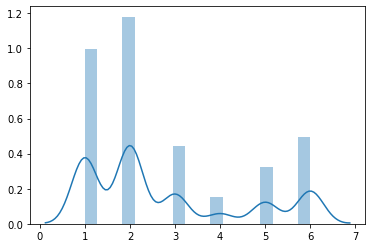

In [24]:

sns.distplot(rel.jobcat)

majority of credit card holders belong to managerial/professional  and sales job.

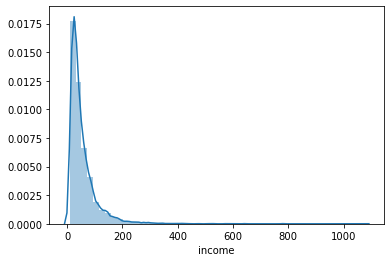

In [25]:
sns.distplot(rel.income)

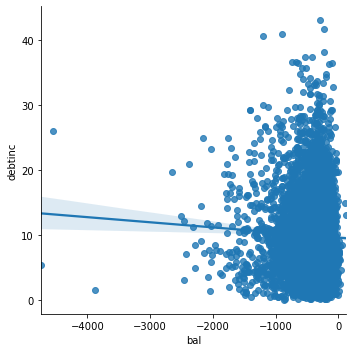

In [26]:
sns.lmplot(x='bal', y='debtinc', data=rel)

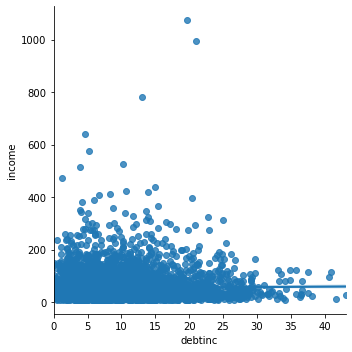

In [27]:
sns.lmplot(x='debtinc', y='income', data=rel)

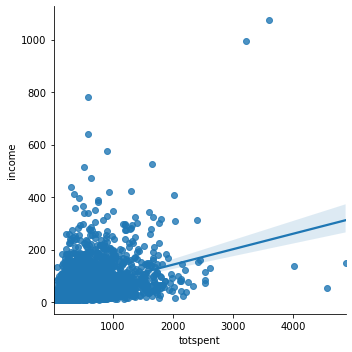

In [28]:
sns.lmplot(x='totspent', y='income', data=re)

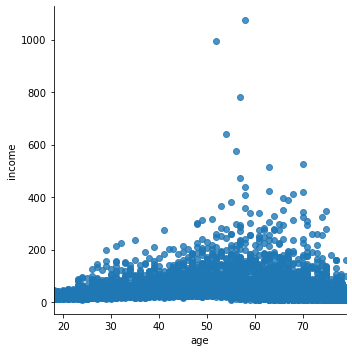

In [29]:

sns.lmplot(x='age', y='income', data=rel)

In the given dataset we have customers age ranging from 18yrs to 76yrs and 
we see that most of the customers have high income are aged between 50years and 72 years

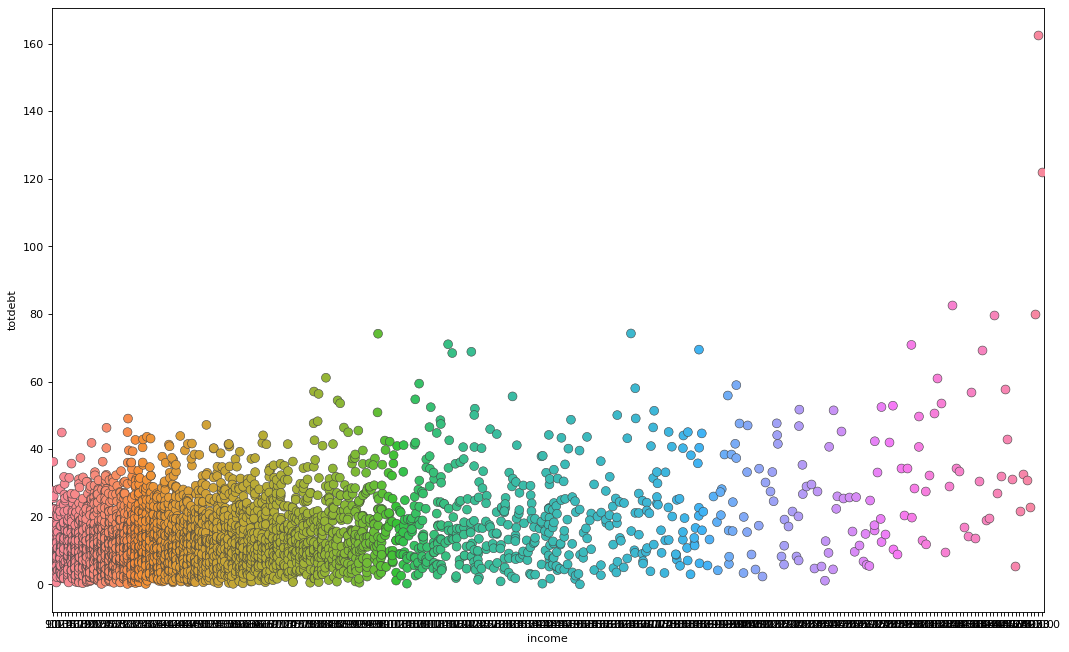

In [30]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(rel.income, rel.totdebt, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()


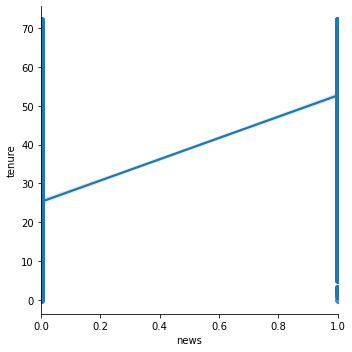

In [31]:
sns.lmplot(x='news', y='tenure', data=rel)

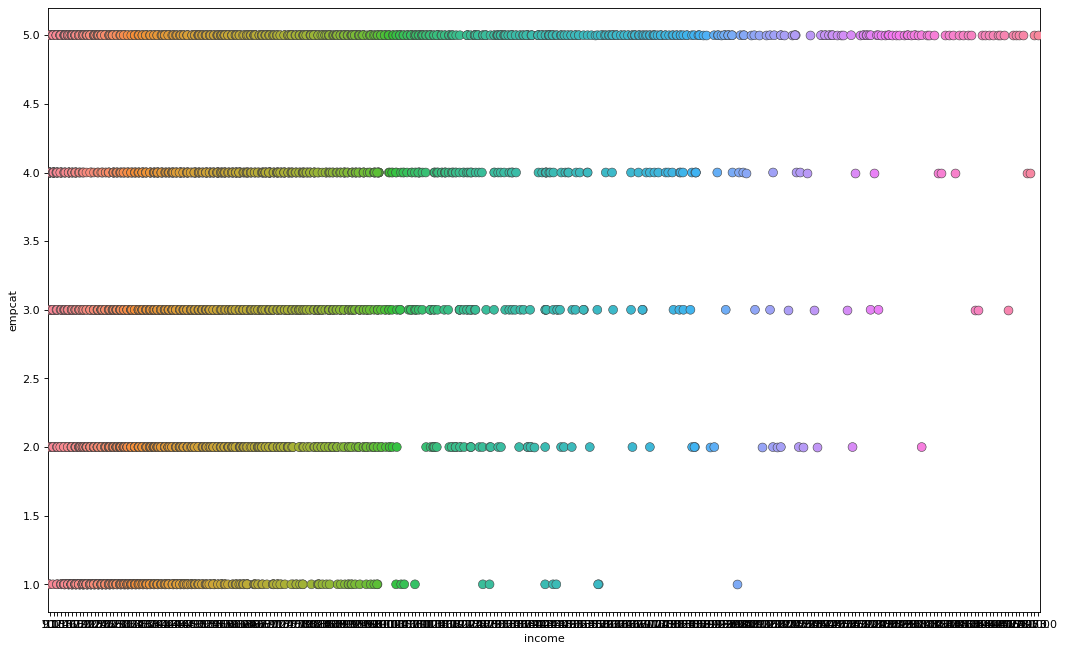

In [32]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(rel.income, rel.empcat, jitter=0.25, size=8, ax=ax, linewidth=.5)

plt.show()

In [33]:
rel.income.value_counts()

22.0      112
29.0      109
25.0      108
30.0      102
20.0      102
23.0      100
18.0      100
24.0       99
32.0       93
16.0       91
21.0       91
28.0       90
31.0       90
17.0       89
15.0       86
33.0       85
19.0       84
9.0        83
34.0       80
35.0       78
27.0       76
26.0       75
14.0       73
38.0       71
37.0       69
36.0       66
41.0       65
42.0       64
46.0       60
40.0       58
11.0       57
45.0       57
44.0       56
13.0       56
10.0       55
43.0       53
12.0       52
49.0       50
39.0       50
48.0       48
53.0       46
52.0       45
47.0       44
59.0       42
60.0       42
51.0       41
54.0       41
56.0       40
50.0       38
62.0       38
68.0       38
55.0       38
66.0       37
58.0       35
64.0       33
57.0       30
73.0       29
84.0       28
67.0       28
61.0       28
80.0       27
70.0       27
74.0       26
81.0       26
69.0       26
72.0       25
76.0       25
65.0       24
63.0       23
77.0       21
90.0       20
88.0  

In [34]:
rel.employ.value_counts()

0.0     659
1.0     389
2.0     318
3.0     309
4.0     293
5.0     260
6.0     250
7.0     191
8.0     187
11.0    184
9.0     176
10.0    164
13.0    131
15.0    130
12.0    120
14.0    104
16.0     95
17.0     93
19.0     84
20.0     83
18.0     77
23.0     55
21.0     53
22.0     52
25.0     47
27.0     45
31.0     44
26.0     42
24.0     42
29.0     41
30.0     40
34.0     29
28.0     29
32.0     28
33.0     26
35.0     22
36.0     18
38.0     18
39.0     18
37.0     17
40.0      8
42.0      7
44.0      6
43.0      6
45.0      3
46.0      1
51.0      1
41.0      1
47.0      1
52.0      1
48.0      1
49.0      1
Name: employ, dtype: int64

INFERENCES 

Psychographic Traits are interests, activities, opinions, values and attitudes of the customer. 
Psychographics seeks to understand the cognitive factors that drive consumer behaviors.
Few examples of psychographic traits are Personality characteristics, Lifestyle, Social class, Attitudes, Principles & beliefs , Activities  and Interests

From the given data set the identified psychographic traits are :
union - polview - polparty - vote - active - edcat - jobcat - reside - pets - commute -  employ - homeown - owntv - news - equip - jobsat - cars - reason 

Compulsive Buying Behaviour is a shopping addiction with uncontrollable purchase of products in spite of financial consequeces.
It is motivated by an internal trigger such as stress or anxiety and customers seek to spend money in order to relieve the stress.

Attributes that help in identifying Compulsive Buying Behavioural are :
income - card - debtinc - creddebt - default - cardspent - age - tenure - churn - cardtype


INFERENCE
1.psychometric traits like -" union membership ,political view ,political party, vote , active lifestyle “ dont influence  the customers to do compulsive buying.
2.The cardtype does not influence buying patterns.
3.People with high pay  and high total debt are most likely to be expensive car owners..
4.Among 5000 customers only less than thousand customers and members of union.
5.Political view has 7 categories.
   1.Extremely liberal 
   2.liberal
   3.slightly liberal 
   4.moderate 
   5.slightly conservative 
   6.conservative 
   7.extremely conservative
customers with modetare political view were highest in number.

6.political party membership ( 1- has membership , 0- no membership )
Among 5000 credit card customers around 3000 are not a member of any political party and remaining 2000 are part of some party.

7.the customers who voted in the last election and who didn’t vote in the last election are almost equally distributed

8.card providers are
1.american express
2.visa 
3.mastercard 
4.discover 
5.other
A very few customers ( around 200+) have card provider other than american express, visa, mastercard and discover

9.customers are equally distributed  across all card types like gold, platinum and silver

10.there is no vast difference between customers who have active lifestyles and those who don't 

11.around 1800 customers don't own a home and are living in rented homes remaining 3200 customers are home owners

12.very less customers (around 500) don't own a car, the remaining their own domestic or imported cars

13.majority of the customers use car as a means of commute followed by bus or walk

14.less than 1000 card holders are retired

15.min cardholder's age is 18 and max is 76

16.majority of credit card holders belong to managerial/professional  and sales job.

17.Balance is the amount remaining after settling all debts and subtracting the amount spent in both primary and secondary card. Customer having low balance have a ability to overspend money .

Debt to income ratio is monthly debt payments divided by the gross monthly income ie borrower’s debt repayment capacity. A high debt-to-income ratio shows an inability to pay new EMIs.

Now when the customer has low balance and high debt to income ratio it is highly likely that they exhibit compulsive buying behaviour .

from the above scatter plot customers are concentrated with insufficient balance and debt to income more than 20.

18.The income and debt to income is given in thousands $ .
High debt to income ratio may infer inability to repay debts or EMIs in the future.
From the scatterplot we clearly see high density of debt to income ratio in customers who have income less than 200.Meaning there are high chances that people with less than 400 to 200 income may be unable to pay back the debts.

19.people have a tendency to spend more than their income 

20. most of the customers have high income are aged between 50years and 72 years



21.as the income increases total debt decreases meaning only people with low income are unable to cope up with their debts.

22.Surprisingly  the customers who have a newspaper subscription  show increase in tenure.





